# Plotting percentatge of mountain incidents acted by the fire departement

In [15]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

## Importing correlated incidents with fire departement actions

In [16]:
direct = 'csv_files/'

df = pd.read_csv(direct + 'Correlations_fire-112.csv')
df['CODI_COMARCA'] = df['CODI_COMARCA'].astype(str).str.zfill(2)
df

,ANY-MES,COMARCA,INCIDENTS,CODI_COMARCA,SALVAMENTS
0,2018-01-01,ALT EMPORDA,803,02,3
1,2018-01-01,ALT PENEDES,594,03,2
2,2018-01-01,ALT URGELL,106,04,1
3,2018-01-01,ANOIA,574,06,3
4,2018-01-01,BAGES,936,07,6
...,...,...,...,...,...
1939,2022-12-01,TARRAGONES,2224,36,1
1940,2022-12-01,TERRA ALTA,40,37,2
1941,2022-12-01,VAL D'ARAN,67,39,9
1942,2022-12-01,VALLES OCCIDENTAL,6115,40,6


In [17]:
def percentatge(x,y):
    p = x/y*100
    return p

data=df.copy()

data['PERCENTATGE'] = data.apply(lambda row: percentatge(row['SALVAMENTS'], row['INCIDENTS']), axis=1)

data

# results= data[data['COMARCA']=='BERGUEDA']
# results

,ANY-MES,COMARCA,INCIDENTS,CODI_COMARCA,SALVAMENTS,PERCENTATGE
0,2018-01-01,ALT EMPORDA,803,02,3,0.373599
1,2018-01-01,ALT PENEDES,594,03,2,0.336700
2,2018-01-01,ALT URGELL,106,04,1,0.943396
3,2018-01-01,ANOIA,574,06,3,0.522648
4,2018-01-01,BAGES,936,07,6,0.641026
...,...,...,...,...,...,...
1939,2022-12-01,TARRAGONES,2224,36,1,0.044964
1940,2022-12-01,TERRA ALTA,40,37,2,5.000000
1941,2022-12-01,VAL D'ARAN,67,39,9,13.432836
1942,2022-12-01,VALLES OCCIDENTAL,6115,40,6,0.098119


In [18]:
aver_perc = data.copy()

aver_perc = pd.DataFrame(aver_perc.groupby(['COMARCA','CODI_COMARCA'])['PERCENTATGE'].apply(np.mean))


aver_perc= aver_perc.reset_index()
aver_perc

,COMARCA,CODI_COMARCA,PERCENTATGE
0,ALT CAMP,01,0.626760
1,ALT EMPORDA,02,0.638836
2,ALT PENEDES,03,0.391637
3,ALT URGELL,04,3.241948
4,ALTA RIBAGORÇA,05,18.512983
5,ANOIA,06,0.695772
6,BAGES,07,0.629164
7,BAIX CAMP,08,0.236266
8,BAIX EBRE,09,0.615059
9,BAIX EMPORDA,10,0.742426


## Importing map

In [19]:
data_dir= '../dades/'
cat = gpd.read_file(data_dir + "divisions-administratives-v2r1-comarques-100000-20220801.shx")
cat.rename(columns = {'NOMCOMAR':'COMARCA'}, inplace = True)
cat.rename(columns = {'CODICOMAR':'CODI_COMARCA'}, inplace = True)
cat.head()

,CODI_COMARCA,COMARCA,CAPCOMAR,AREAC5000,geometry
0,01,Alt Camp,Valls,537.6317,"POLYGON ((373635.755 4592021.079, 373669.333 4..."
1,02,Alt Empordà,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492..."
2,03,Alt Penedès,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4..."
3,04,Alt Urgell,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360736.000 4649167.000, 360624..."
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((326572.730 4721574.001, 326622.339 4..."


## Merging map and data and plotting

In [20]:
data_merged =pd.merge(cat, aver_perc, on=['CODI_COMARCA'])
data_merged.head()

,CODI_COMARCA,COMARCA_x,CAPCOMAR,AREAC5000,geometry,COMARCA_y,PERCENTATGE
0,01,Alt Camp,Valls,537.6317,"POLYGON ((373635.755 4592021.079, 373669.333 4...",ALT CAMP,0.626760
1,02,Alt Empordà,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492...",ALT EMPORDA,0.638836
2,03,Alt Penedès,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4...",ALT PENEDES,0.391637
3,04,Alt Urgell,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360736.000 4649167.000, 360624...",ALT URGELL,3.241948
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((326572.730 4721574.001, 326622.339 4...",ALTA RIBAGORÇA,18.512983


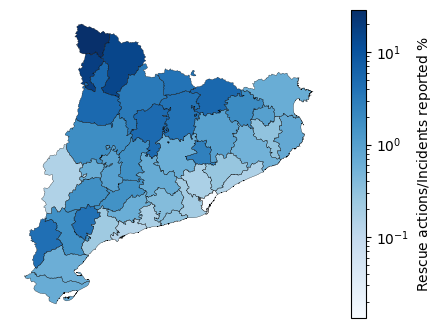

In [24]:
merged_rescue_tot_gpd= data_merged.copy()



fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
norm = LogNorm()
# plt.rc('text', usetex = True)
# plt.rc('font', family='serif')
plot = merged_rescue_tot_gpd.plot(column = 'PERCENTATGE',
                                  ax=ax,
                                  legend=False,
                                  cmap='Blues',
                                  norm = norm,
                                  legend_kwds={'orientation': "horizontal", 'pad': 0.2})
merged_rescue_tot_gpd.boundary.plot(ax = ax, linewidth = 0.2, color = 'black')
merged_rescue_tot_gpd = merged_rescue_tot_gpd.set_index("COMARCA_x")
#merged_rescue_tot_gpd.loc[list(colors.keys()),:].boundary.plot(ax=ax,color=list(colors.values()), linewidth = 1.5)
merged_rescue_tot_gpd = merged_rescue_tot_gpd.reset_index()
cbar = fig.colorbar(plot.get_children()[0], ax = ax, label = 'Rescue actions/Incidents reported $\%$')
cb_ax = fig.axes[1] 
# cb_ax.tick_params(labelsize=10)
plt.savefig('figures/perc_rescats_vs_incidents.pdf')
plt.show()